<a href="https://colab.research.google.com/github/MarioPrado1148/DSWP/blob/master/120_anos_eventos_ol%C3%ADmpicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
url = '/content/drive/My Drive/Datasets/eventos_olimpicos/athlete_events.csv'

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
import pandas as pd
df_olympics = pd.read_csv(url)

In [7]:
df_olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [8]:
# retorna para cada coluna de `frame`: nome da coluna, valor de exemplo, 
#     dtype da coluna, classe do valor de exemplo
# valor de exemplo é tomado na linha de `frame` indicada por `iloc`
def exemplo_linha(frame, iloc=0):
  df_info = pd.DataFrame(dict(valor_exemplo=frame.iloc[iloc].copy()))
  df_info['dtype_coluna'] = frame.dtypes.map(lambda x: x.name)
  df_info['classe_valor'] = df_info['valor_exemplo'].map(lambda x: x.__class__.__name__)
  df_info.index.name = 'nome_coluna'
  return df_info

In [9]:
exemplo_linha(df_olympics)

,valor_exemplo,dtype_coluna,classe_valor
nome_coluna,,,
ID,1,int64,int64
Name,A Dijiang,object,str
Sex,M,object,str
Age,24,float64,float64
Height,180,float64,float64
Weight,80,float64,float64
Team,China,object,str
NOC,CHN,object,str
Games,1992 Summer,object,str


In [61]:
# conversão dos nomes de colunas para minúsculas
df_olympics.set_axis(df_olympics.columns.str.lower(), axis=1, inplace=True)

# Tratamento de Missing Values

## Verificação dos Missing Values

In [12]:
df_olympics.isna().sum()

id             0
name           0
sex            0
age         9474
height     60171
weight     62875
team           0
noc            0
games          0
year           0
season         0
city           0
sport          0
event          0
medal     231333
dtype: int64

## Eliminação dos Missing Values

In [65]:
df_olympics2 = df_olympics.dropna()

## Nova verificação dos Missing Values

In [19]:
df_olympics2.isna().sum()

id        0
name      0
sex       0
age       0
height    0
weight    0
team      0
noc       0
games     0
year      0
season    0
city      0
sport     0
event     0
medal     0
dtype: int64

(array([   8.,   10.,   23.,   36.,   62.,  102.,   96.,  244.,  287.,
         906.,  645.,  910., 1896., 1429., 3031., 1948., 2986., 2146.,
        2391., 3050., 1911., 1801., 1264.,  886.,  843.,  432.,  360.,
         190.,  133.,   57.,   30.,   33.,    9.,   18.,    4.,    4.]),
 array([136.        , 138.41666667, 140.83333333, 143.25      ,
        145.66666667, 148.08333333, 150.5       , 152.91666667,
        155.33333333, 157.75      , 160.16666667, 162.58333333,
        165.        , 167.41666667, 169.83333333, 172.25      ,
        174.66666667, 177.08333333, 179.5       , 181.91666667,
        184.33333333, 186.75      , 189.16666667, 191.58333333,
        194.        , 196.41666667, 198.83333333, 201.25      ,
        203.66666667, 206.08333333, 208.5       , 210.91666667,
        213.33333333, 215.75      , 218.16666667, 220.58333333,
        223.        ]),
 <a list of 36 Patch objects>)

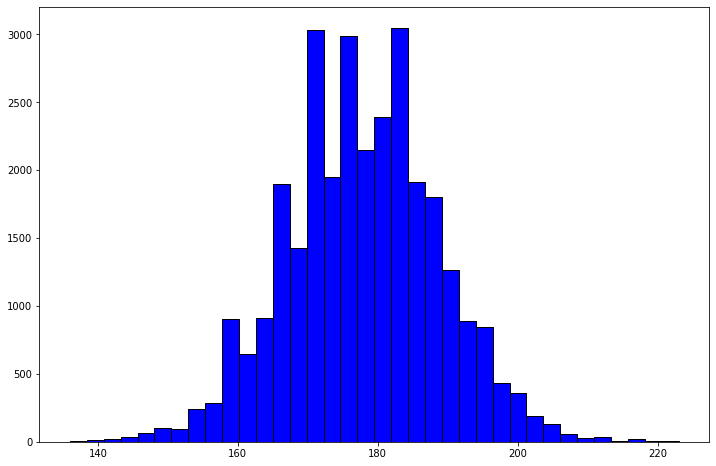

In [25]:
plt.figure(figsize = (12, 8))
plt.hist(df_olympics2['height'], color = 'blue', edgecolor = 'black', bins = int(180/5))

In [54]:
from sklearn.preprocessing import StandardScaler
olympics_standard_scaler = StandardScaler().fit_transform(df_olympics2[['weight','height']])
df_olympics_standard_scaler = pd.DataFrame(olympics_standard_scaler, columns=[['weight','height']])
df_olympics_standard_scaler.head()

,weight,height
0,0.749526,0.581988
1,-0.650031,-0.241885
2,-0.650031,-0.241885
3,-0.650031,-0.241885
4,-0.650031,-0.241885


In [60]:
df_olympics2['weight'].head()
#A1_scale_fit = StandardScaler().fit(df_A1) # Aplica o fit() separadamente
#df_olympics2_standard_scale_fit = StandardScaler().fit(df_olympics2['weight'])

40    85.0
41    64.0
42    64.0
44    64.0
48    64.0
Name: weight, dtype: float64